In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
ticker_list = ['SOL-USD','ETH-USD','BTC-USD']

In [3]:
import pandas as pd
import yfinance as yf
import datetime as dt

start_date = dt.datetime(2011, 1, 1)
end_date = dt.datetime(2024, 12, 5)

ticker_list = ["BTC-USD"]
data = yf.download(ticker_list, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1))
weekly_data = data.resample('W').last()
weekly_returns = weekly_data['Adj Close'].pct_change().dropna()
weekly_returns.index = weekly_returns.index.tz_localize(None)
weekly_data.index = weekly_data.index.tz_localize(None)

print("Weekly Adjusted Close Percentage Change:")
print(weekly_returns)

print("\nWeekly OHLC and Volume Data:")
print(weekly_data)# Plot Weekly Returns

[*********************100%***********************]  1 of 1 completed

Weekly Adjusted Close Percentage Change:
Ticker       BTC-USD
Date                
2014-09-28 -0.054260
2014-10-05 -0.150249
2014-10-12  0.181083
2014-10-19  0.029050
2014-10-26 -0.089443
...              ...
2024-11-10  0.170685
2024-11-17  0.116456
2024-11-24  0.090911
2024-12-01 -0.007489
2024-12-08  0.015304

[533 rows x 1 columns]

Weekly OHLC and Volume Data:
Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2014-09-21    398.821014    398.821014    412.425995    393.181000   
2014-09-28    377.181000    377.181000    401.016998    374.332001   
2014-10-05    320.510010    320.510010    341.800995    289.295990   
2014-10-12    378.549011    378.549011    379.433014    356.144012   
2014-10-19    389.545990    389.545990    393.938995    386.457001   
...                  ...           ...           ...           ...   
20

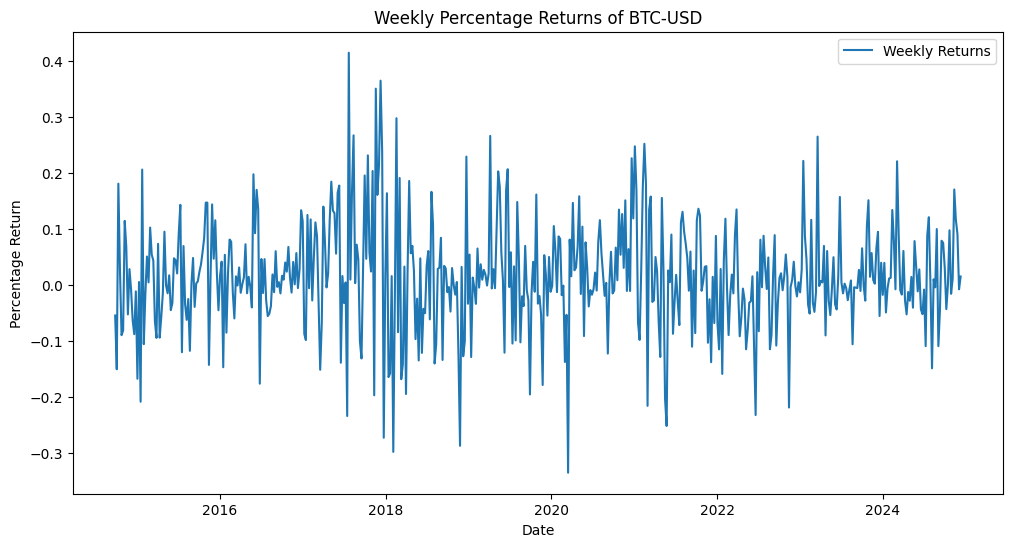

In [4]:
# Plot Weekly Returns
plt.figure(figsize=(12, 6))
plt.plot(weekly_returns, label='Weekly Returns')
plt.title('Weekly Percentage Returns of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.show()

In [5]:
# Perform ADF test
adf_result = adfuller(weekly_returns)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.422259
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


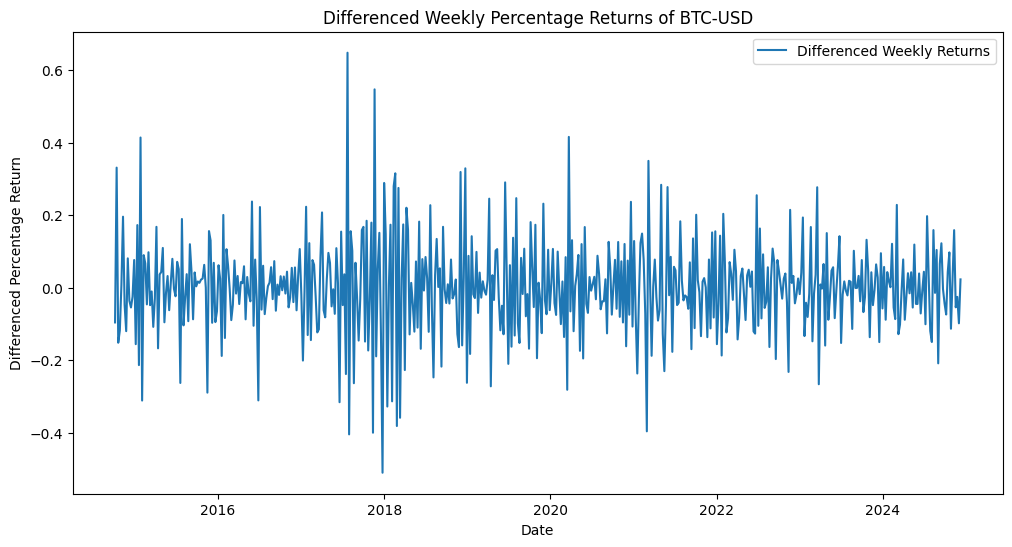

ADF Statistic (Differenced): -9.993353
p-value (Differenced): 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [6]:
# Since p-value > 0.05, difference the data
weekly_returns_diff = weekly_returns.diff().dropna()

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(weekly_returns_diff, label='Differenced Weekly Returns')
plt.title('Differenced Weekly Percentage Returns of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Differenced Percentage Return')
plt.legend()
plt.show()

# Perform ADF test on differenced data
adf_result_diff = adfuller(weekly_returns_diff)

print('ADF Statistic (Differenced): %f' % adf_result_diff[0])
print('p-value (Differenced): %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

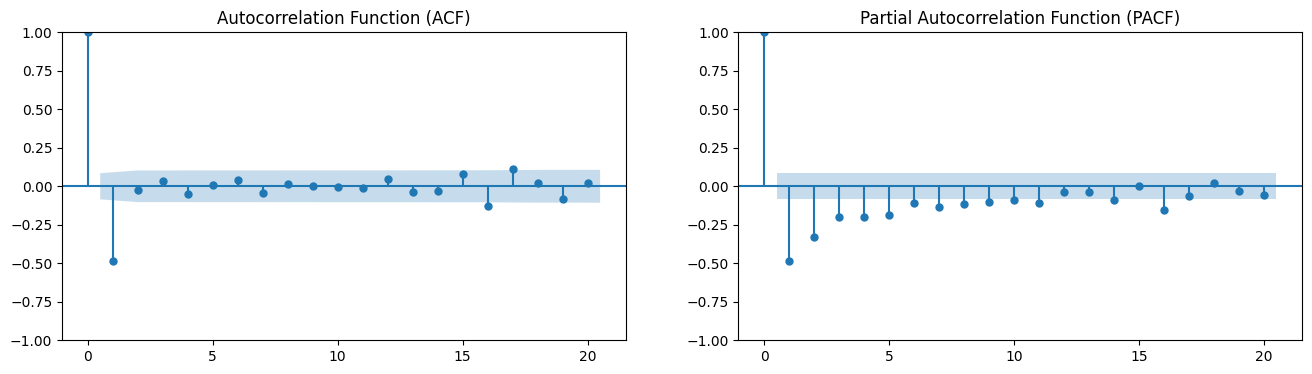

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16,4))

plot_acf(weekly_returns_diff, ax=ax[0], lags=20)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(weekly_returns_diff, ax=ax[1], lags=20, method='ywm')
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(weekly_returns, order=(1,1,1))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                BTC-USD   No. Observations:                  533
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 481.396
Date:                Thu, 05 Dec 2024   AIC                           -956.793
Time:                        21:55:59   BIC                           -943.963
Sample:                    09-28-2014   HQIC                          -951.772
                         - 12-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0743      0.036      2.071      0.038       0.004       0.145
ma.L1         -1.0000      1.236     -0.809      0.419      -3.423       1.423
sigma2         0.0095      0.012      0.811      0.4

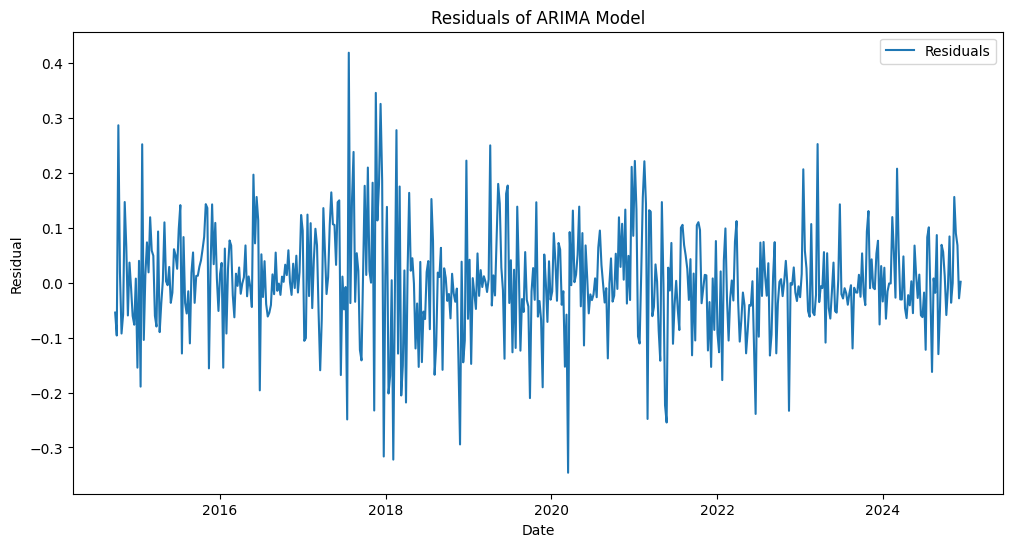

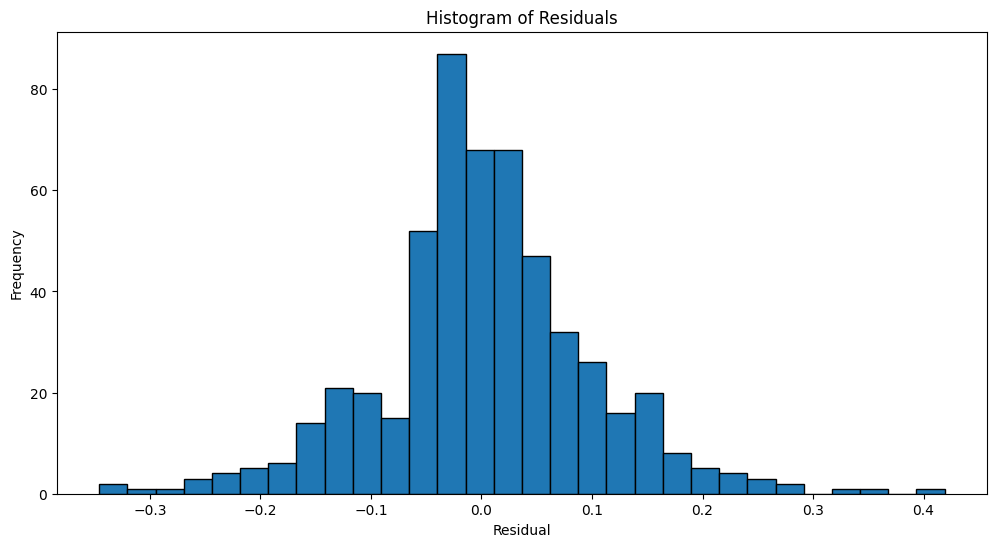

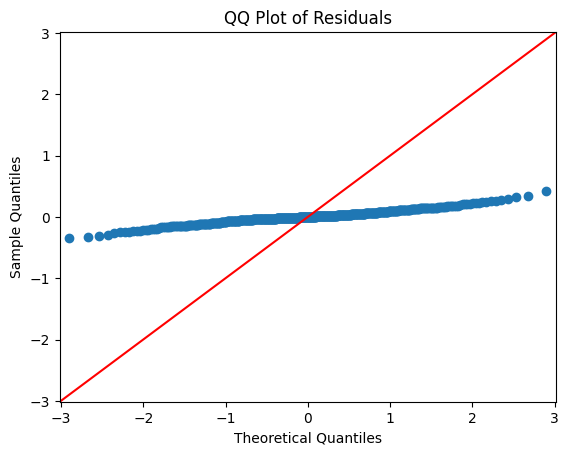

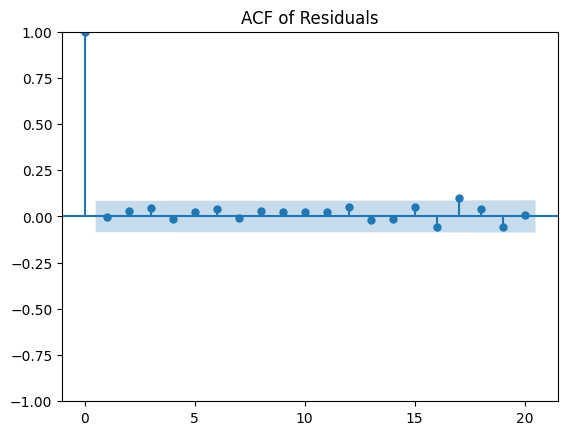

      lb_stat  lb_pvalue
1    0.016287   0.898451
2    0.410417   0.814478
3    1.524551   0.676616
4    1.599500   0.808882
5    1.857628   0.868473
6    2.807782   0.832557
7    2.859522   0.897686
8    3.294254   0.914558
9    3.674667   0.931492
10   3.968594   0.948753
11   4.337940   0.958969
12   5.737381   0.928737
13   5.891117   0.950026
14   6.014133   0.966134
15   7.324158   0.948022
16   9.226338   0.903800
17  15.009051   0.594830
18  15.985638   0.593550
19  17.870496   0.531104
20  17.889215   0.594706


In [9]:
# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(12,6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(12,6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# QQ-plot
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# ACF of residuals
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box = acorr_ljungbox(residuals, lags=20, return_df=True)
print(ljung_box)


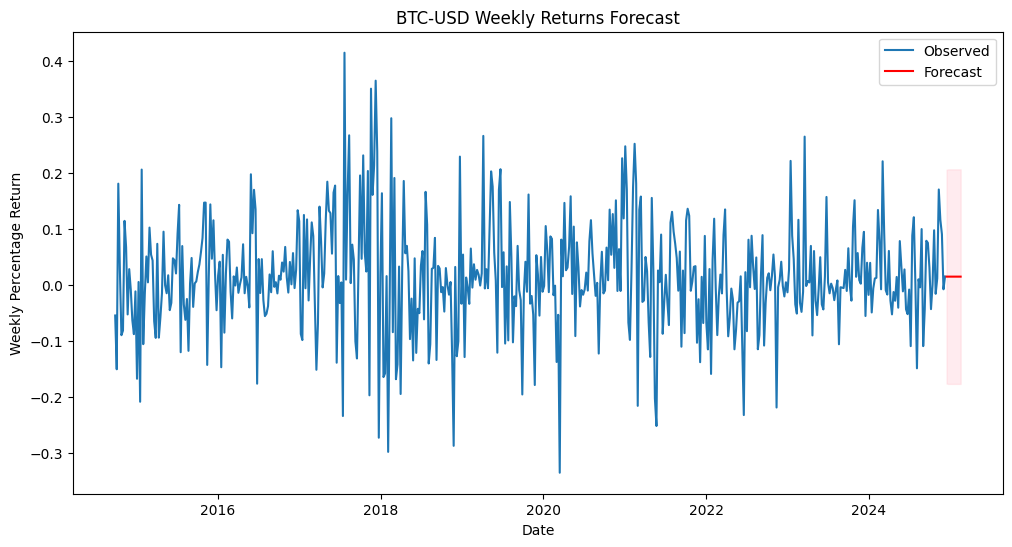

Forecasted Weekly Returns:
2024-12-15    0.015126
2024-12-22    0.015113
2024-12-29    0.015112
2025-01-05    0.015112
2025-01-12    0.015112
2025-01-19    0.015112
2025-01-26    0.015112
2025-02-02    0.015112
2025-02-09    0.015112
2025-02-16    0.015112
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [10]:
# Forecast the next 10 weeks
forecast_steps = 10
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(weekly_returns, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:,0],
                 forecast_conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title('BTC-USD Weekly Returns Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Percentage Return')
plt.legend()
plt.show()

# Display forecasted values
print("Forecasted Weekly Returns:")
print(forecast_mean)


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
Ticker       BTC-USD
Date                
2014-09-28 -0.054260
2014-10-05 -0.150249
2014-10-12  0.181083
2014-10-19  0.029050
2014-10-26 -0.089443
Scaled Returns DataFrame:
Ticker       Returns
Date                
2014-09-28 -0.054260
2014-10-05 -0.150249
2014-10-12  0.181083
2014-10-19  0.029050
2014-10-26 -0.089443


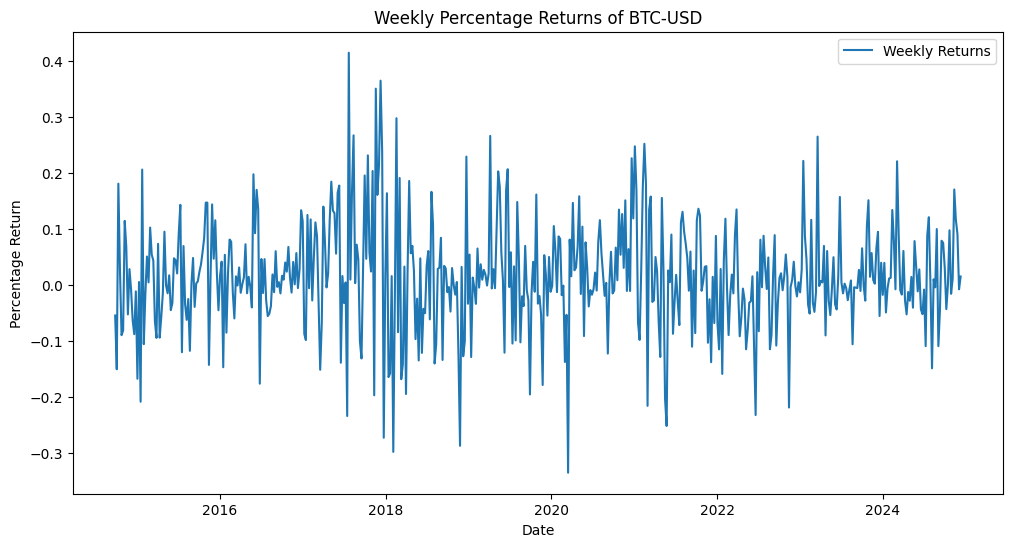

Scaled Returns:
             Returns
Date                
2014-09-28  0.374353
2014-10-05  0.246333
2014-10-12  0.688230
2014-10-19  0.485464
2014-10-26  0.327431
Shape of X: (523, 10)
Shape of y: (523,)
Training samples: 418
Testing samples: 105


In [20]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Define the date range
start_date = dt.datetime(2011, 1, 1)
end_date = dt.datetime(2024, 12, 5)

# Define the ticker
ticker = "BTC-USD"

# Fetch the data
data = yf.download(ticker, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1))

# Resample to weekly data and compute the last value of each week
weekly_data = data.resample('W').last()

# Calculate weekly percentage returns
weekly_returns = weekly_data['Adj Close'].pct_change().dropna()

# Remove timezone information
weekly_returns.index = weekly_returns.index.tz_localize(None)

# Inspect weekly_returns
print(type(weekly_returns))
print(weekly_returns.head())

# Convert weekly_returns to DataFrame if it's a Series
if isinstance(weekly_returns, pd.Series):
    returns_df = weekly_returns.to_frame(name='Returns')
else:
    # If it's already a DataFrame, ensure it has the correct column name
    if weekly_returns.shape[1] == 1:
        returns_df = weekly_returns.rename(columns={weekly_returns.columns[0]: 'Returns'})
    else:
        # If there are multiple columns, select the 'Returns' column
        returns_df = weekly_returns[['Returns']]

print("Scaled Returns DataFrame:")
print(returns_df.head())

# Plot the weekly returns
plt.figure(figsize=(12, 6))
plt.plot(returns_df, label='Weekly Returns')
plt.title('Weekly Percentage Returns of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.show()

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(returns_df)
scaled_returns = pd.DataFrame(scaled_data, index=returns_df.index, columns=['Returns'])

print("Scaled Returns:")
print(scaled_returns.head())

# Creating Sequences
def create_sequences(data, sequence_length=10):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

sequence_length = 10  # Number of past weeks to use for prediction

X, y = create_sequences(scaled_returns.values, sequence_length)

print(f"Shape of X: {X.shape}")  # (samples, sequence_length)
print(f"Shape of y: {y.shape}")  # (samples,)

# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Proceed with the rest of your PyTorch implementation...


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
Ticker       BTC-USD
Date                
2014-09-28 -0.054260
2014-10-05 -0.150249
2014-10-12  0.181083
2014-10-19  0.029050
2014-10-26 -0.089443
Scaled Returns DataFrame:
Ticker       Returns
Date                
2014-09-28 -0.054260
2014-10-05 -0.150249
2014-10-12  0.181083
2014-10-19  0.029050
2014-10-26 -0.089443


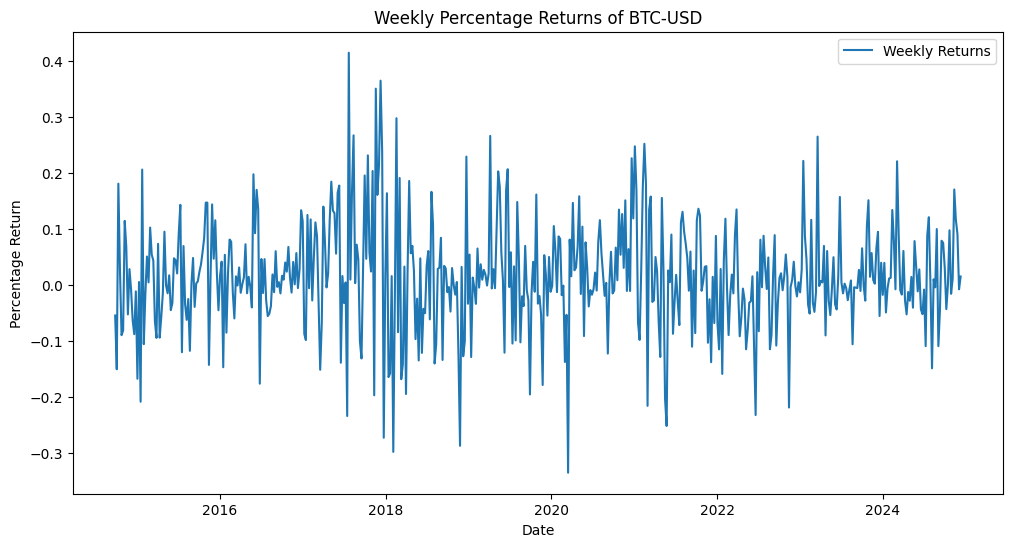

Scaled Returns:
             Returns
Date                
2014-09-28  0.374353
2014-10-05  0.246333
2014-10-12  0.688230
2014-10-19  0.485464
2014-10-26  0.327431
Shape of X: (513, 20)
Shape of y: (513,)
Training samples: 410
Testing samples: 103
LSTMModel(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)
Epoch [1/300], Training Loss: 0.111720, Validation Loss: 0.010456
Epoch [2/300], Training Loss: 0.023723, Validation Loss: 0.012499
Epoch [3/300], Training Loss: 0.022202, Validation Loss: 0.009009
Epoch [4/300], Training Loss: 0.019151, Validation Loss: 0.008947
Epoch [5/300], Training Loss: 0.019084, Validation Loss: 0.009101
Epoch [6/300], Training Loss: 0.018782, Validation Loss: 0.008985
Epoch [7/300], Training Loss: 0.018784, Validation Loss: 0.008971
Epoch [8/300], Training Loss: 0.019107, Validation Loss: 0.009018
Epoch [9/300], Training Loss: 0.018987, Validation Loss: 0.008962
Epoch [10/300], Train

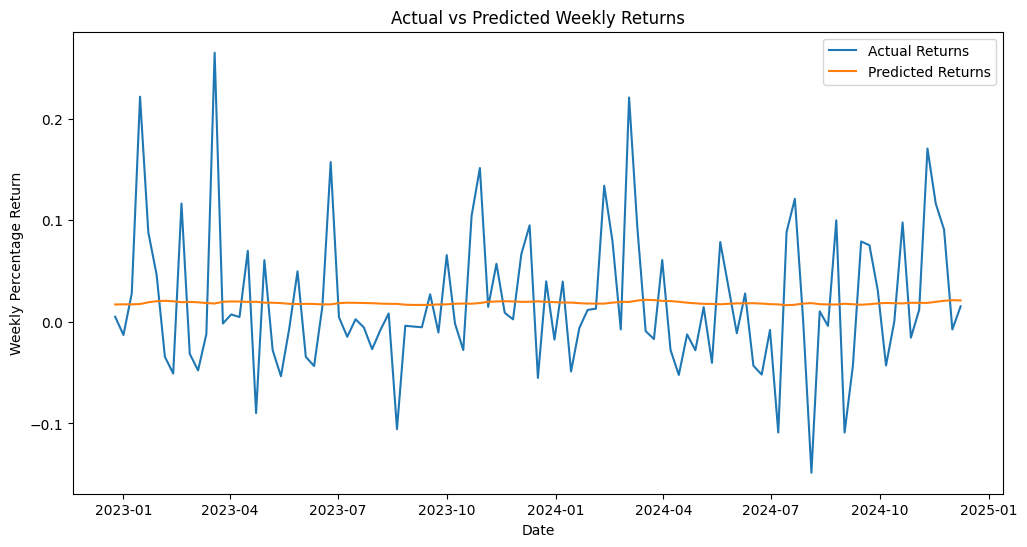

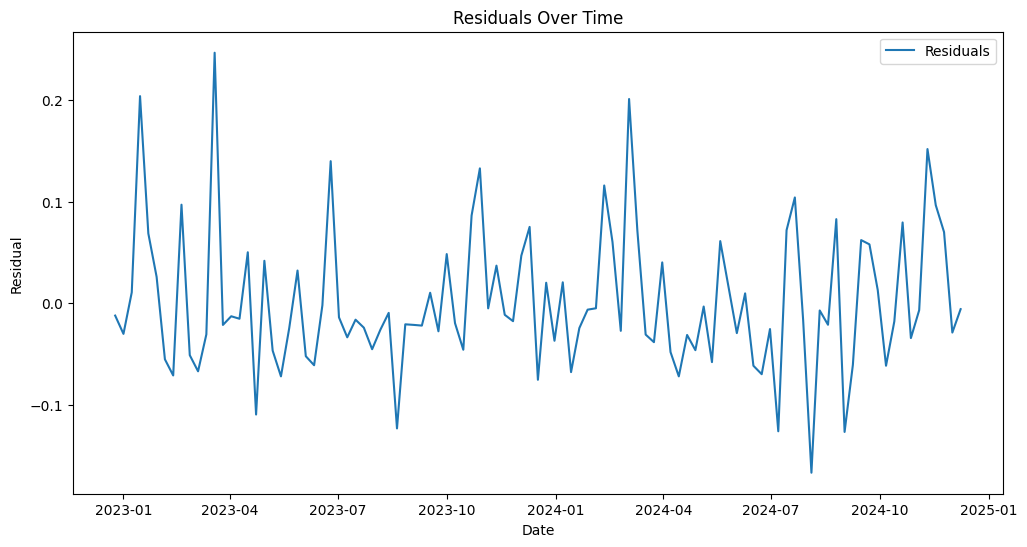

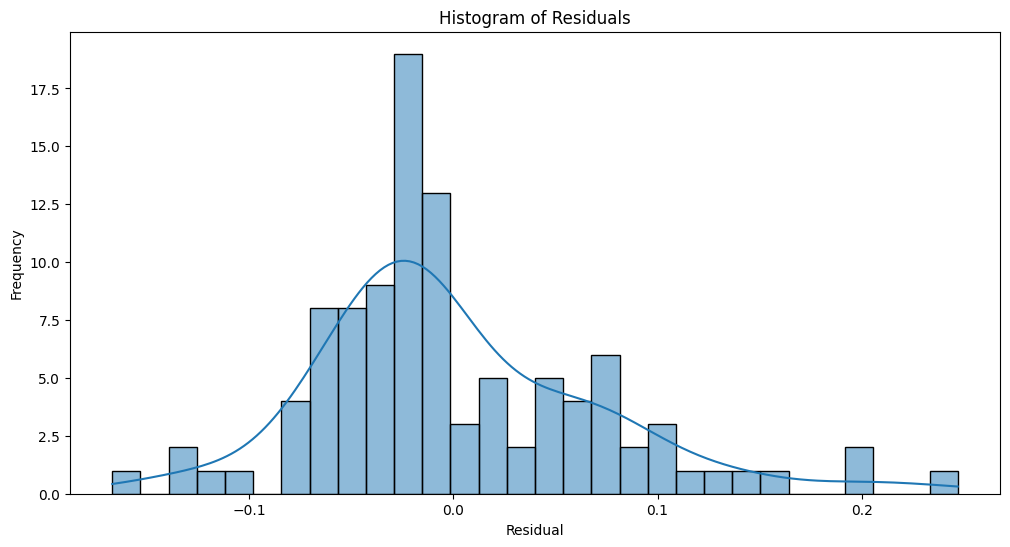

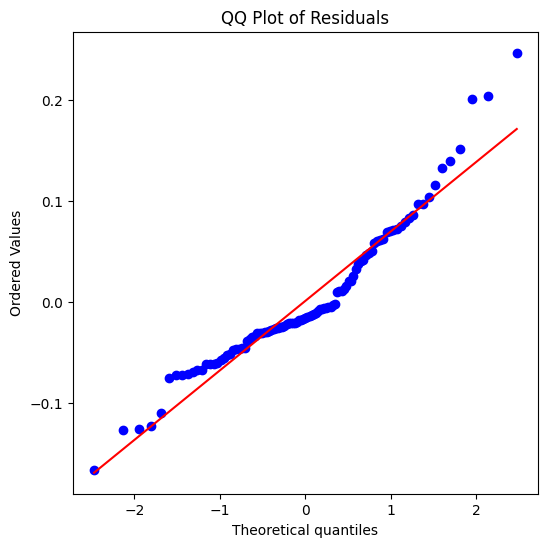

In [24]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

# 1. Fetch and Prepare the Data
start_date = dt.datetime(2011, 1, 1)
end_date = dt.datetime(2024, 12, 5)
ticker = "BTC-USD"
data = yf.download(ticker, start=start_date - pd.offsets.BDay(1), end=end_date + pd.offsets.BDay(1))
weekly_data = data.resample('W').last()
weekly_returns = weekly_data['Adj Close'].pct_change().dropna()
weekly_returns.index = weekly_returns.index.tz_localize(None)

# Inspect weekly_returns
print(type(weekly_returns))
print(weekly_returns.head())

# Convert weekly_returns to DataFrame if it's a Series
if isinstance(weekly_returns, pd.Series):
    returns_df = weekly_returns.to_frame(name='Returns')
else:
    # If it's already a DataFrame, ensure it has the correct column name
    if weekly_returns.shape[1] == 1:
        returns_df = weekly_returns.rename(columns={weekly_returns.columns[0]: 'Returns'})
    else:
        # If there are multiple columns, select the 'Returns' column
        returns_df = weekly_returns[['Returns']]

print("Scaled Returns DataFrame:")
print(returns_df.head())

# Plot the weekly returns
plt.figure(figsize=(12, 6))
plt.plot(returns_df, label='Weekly Returns')
plt.title('Weekly Percentage Returns of BTC-USD')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.legend()
plt.show()

# 2. Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(returns_df)
scaled_returns = pd.DataFrame(scaled_data, index=returns_df.index, columns=['Returns'])

print("Scaled Returns:")
print(scaled_returns.head())

# 3. Creating Sequences
def create_sequences(data, sequence_length=10):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

sequence_length = 20  # Number of past weeks to use for prediction

X, y = create_sequences(scaled_returns.values, sequence_length)

print(f"Shape of X: {X.shape}")  # (samples, sequence_length)
print(f"Shape of y: {y.shape}")  # (samples,)

# 4. Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 5. Creating PyTorch Datasets and DataLoaders
class TimeSeriesDataset(Dataset):
    def __init__(self, sequences, targets):
        self.X = torch.tensor(sequences, dtype=torch.float32)
        self.y = torch.tensor(targets, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 6. Building the LSTM Model with PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        
        # Define the output layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # (num_layers, batch, hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: (batch, seq_length, hidden_size)
        
        # Take the output from the last time step
        out = out[:, -1, :]  # (batch, hidden_size)
        
        # Pass through the output layer
        out = self.fc(out)  # (batch, output_size)
        return out

# Instantiate the model
model = LSTMModel()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(model)

# 7. Training the Model
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 300
patience = 10
best_val_loss = np.inf
epochs_no_improve = 0
early_stop_flag = False

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(-1).to(device)  # Add feature dimension
        y_batch = y_batch.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
    
    # Validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.unsqueeze(-1).to(device)
            y_batch = y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            val_losses.append(loss.item())
    
    # Compute average losses
    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}')
    
    # Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_lstm_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping!')
            early_stop_flag = True
            break

if not early_stop_flag:
    # Save the final model
    torch.save(model.state_dict(), 'final_lstm_model.pth')

# 8. Evaluating the Model
# Load the best model
model.load_state_dict(torch.load('best_lstm_model.pth'))
model.eval()

# Collect all test predictions and actual values
all_preds = []
all_actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(-1).to(device)
        y_batch = y_batch.to(device)
        outputs = model(X_batch)
        all_preds.append(outputs.cpu().numpy())
        all_actuals.append(y_batch.cpu().numpy())

# Concatenate all batches
y_pred = np.concatenate(all_preds, axis=0)
y_test_array = np.concatenate(all_actuals, axis=0)

# Inverse transform to get actual return values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test_array.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 9. Making Predictions
# Create a DataFrame for actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test_inv.flatten(),
    'Predicted': y_pred_inv.flatten()
}, index=weekly_returns.index[-len(y_test):])

print(comparison_df.head())

# Plot actual vs predicted returns
plt.figure(figsize=(12,6))
plt.plot(comparison_df['Actual'], label='Actual Returns')
plt.plot(comparison_df['Predicted'], label='Predicted Returns')
plt.title('Actual vs Predicted Weekly Returns')
plt.xlabel('Date')
plt.ylabel('Weekly Percentage Return')
plt.legend()
plt.show()

# 10. Residual Analysis
# Calculate residuals
residuals = comparison_df['Actual'] - comparison_df['Predicted']

# Residuals Over Time
plt.figure(figsize=(12,6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(12,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# QQ-Plot of Residuals
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()
